# Machine Learning Project - Tyres' Failure Prediction

## Data set description

|Attribute | Type | Notes
| :---        |    :----:   |          ---: |
|vulc | Numerical | Vulcanization level|
|perc nat rubber | Numerical | % natural rubber|
|weather | Numerical | Weather condition index: 1: best, 0: worst|
|perc imp | Numerical | % impurities|
|temperature | Numerical | Temperature in °C|
|elevation | Numerical | Elevation in meters above sea level|
|perc exp comp | Numerical | % experimental compound|
|diameter | Numerical | Diameter in cm|
|tread type | Categorical| 
|tyre season | Categorical | 0: winter tyre, 1: summer tyre|
|month | Categorical | Month of testing|
|tread depth | Categorical| 
|wiring strength | Categorical|
|tyre quality | Categorical | 0: standard, 1: premium|
|add layers | Categorical | Number of additional inner layers|

### Data Snooping 

In [147]:
# Importing libraries required for preliminary analyses and importing dataset

import pandas as pd
import numpy as np

df =  pd.read_csv("../data/train/tyres_model.csv")

In [148]:
# Data Snooping
print(df.head())
print(df.shape)
print(df.describe()) #Also used to see whether in categorical variables some outliers exist or not

     vulc  perc_nat_rubber  wiring_strength  weather  perc_imp  temperature  \
0  17.990               26                1     0.16      0.01        -8.12   
1  20.704               36                1     0.30      0.01        -4.52   
2  19.156               34                1     0.30      0.01        -1.08   
3  16.802               35                1     0.19      0.02         7.44   
4  17.140               23                2     0.39      0.01        30.52   

   tread_type  tyre_season  elevation  month  tread_depth  tyre_quality  \
0           0            1      332.5      8            0             1   
1           2            0      328.0     11            1             0   
2           0            0      247.0      0            1             0   
3           1            0      408.0      7            3             1   
4           0            1      308.0      2            2             0   

   perc_exp_comp  diameter  add_layers  failure  
0           5.13      55

In [3]:
# Checking for duplicates

df[df.duplicated()]

# NO duplicated data are present

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure


In [149]:
# Checking for missing values

print(df.isna().any())

# Only diameter has nan values...How many?

df[df.isna().any(axis=1)] 

# 2110 missing entries for "diameter"
# What to do? Is Diameter important or not? --> Check with the theory first, indeed 890 would be already enough to train a model


vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool


,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,17.860,21,1,0.16,0.01,-6.48,0,1,336.5,8,0,1,5.85,NaN,1,0
2994,19.298,29,1,0.03,0.00,-1.00,2,1,167.5,8,0,0,5.82,NaN,2,0
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1


### Two paths
#### Due to the allegedly importance of the variable diameter, we have opted to move on with two different paths: 
1) We decide to remove the diamter column (among some others that will decided later) --> df_drop
2) We decide to keep the diameter varibale since believed to be extremely useful --> df

#### We will chose the best model for both cases and then compare them. The best one among the two, will be used.

In [177]:
# Outliers Detection: Division between categorical and numerical 

# With diameter
categorical = ["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers"]

numerical = list(df.columns)

for i in categorical: 
    if i in df.columns: 
        numerical.remove(i)
        
print(numerical)

df_numeric = df[numerical].dropna(axis = 0)
df_categorical = df[categorical].dropna(axis = 0)


# Creating the frame whithout diamter

df_drop = df.dropna(axis = 1)
df_drop_numeric = df[df_numeric.columns].dropna(axis=1)
print(df_drop_numeric)
df_drop_categorical = df[df_categorical.columns].dropna(axis=1)
print(df_drop_categorical)


['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation', 'perc_exp_comp', 'diameter', 'failure']
        vulc  perc_nat_rubber  weather  perc_imp  temperature  elevation  \
0     17.990               26     0.16      0.01        -8.12      332.5   
1     20.704               36     0.30      0.01        -4.52      328.0   
2     19.156               34     0.30      0.01        -1.08      247.0   
3     16.802               35     0.19      0.02         7.44      408.0   
4     17.140               23     0.39      0.01        30.52      308.0   
...      ...              ...      ...       ...          ...        ...   
2995  17.818               29     0.39      0.01         7.28      287.5   
2996  17.076               30     0.22      0.00        -1.44      152.5   
2997  16.170               33     0.39      0.01        -3.44      235.0   
2998  18.872               37     0.03      0.00        -0.76      290.0   
2999  20.272               33     0.06      0

<AxesSubplot:>

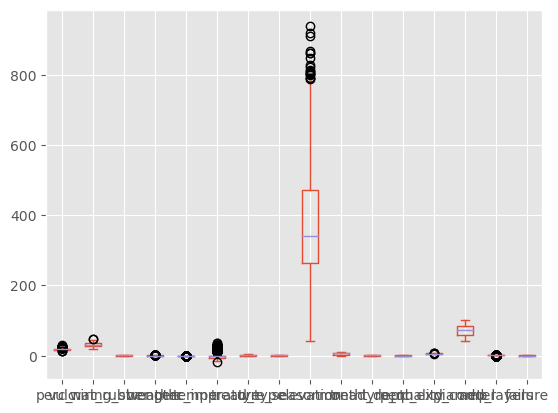

In [169]:
# Outliers' detection only on numeric variables (not categorcal since seen before that no "wrong" values exist)

df.plot.box()

array([[<AxesSubplot:title={'center':'vulc'}>,
        <AxesSubplot:title={'center':'perc_nat_rubber'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'perc_imp'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'elevation'}>],
       [<AxesSubplot:title={'center':'perc_exp_comp'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'failure'}>]], dtype=object)

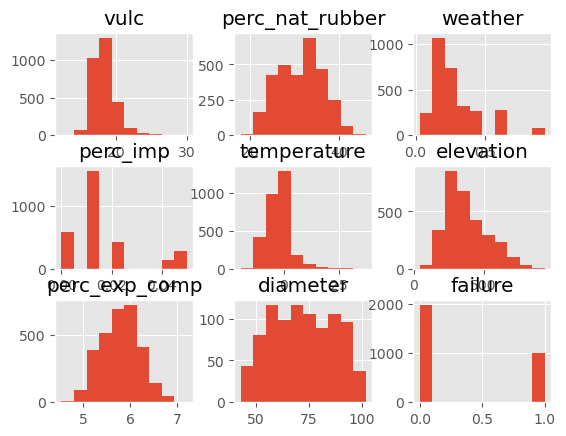

In [159]:
# Checking distribution

df[df_numeric.columns].hist()

# Transforming "vulc" and "temperature" could be sensless. Anyways scaling them migth have sense in order to 
# bring them on similar scales

#Let's check the numeric ones one by one and try to transform them in order to "de-emphasize" outliers' presence

<AxesSubplot:>

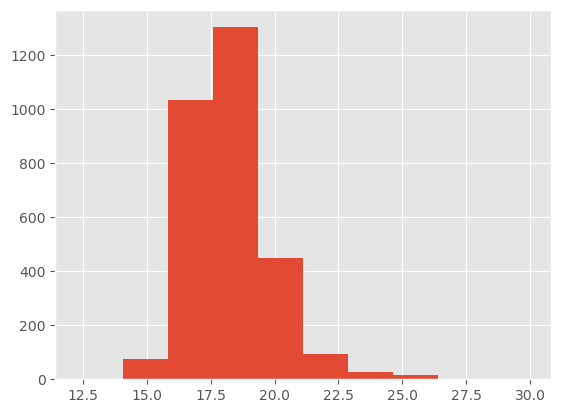

In [170]:
df_drop_numeric["vulc"].hist() #Looks slightly decaying, let's transform it

<AxesSubplot:>

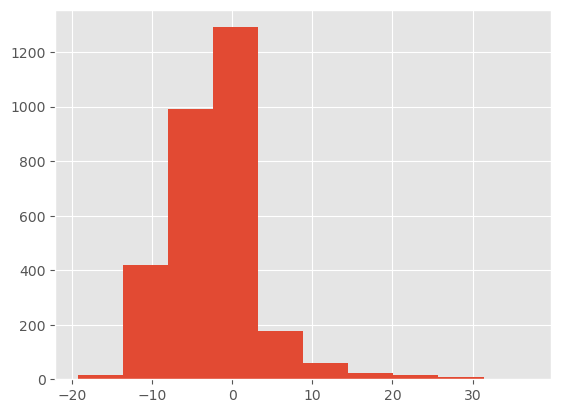

In [171]:
df_drop_numeric["temperature"].hist() #Looks slightly decaying, but does it make sense to transform temperature?....

<AxesSubplot:>

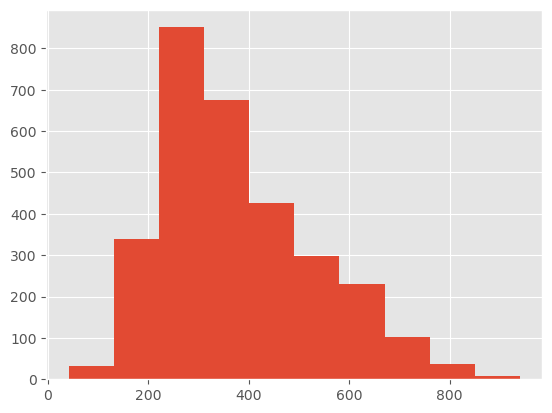

In [172]:
df_drop_numeric["elevation"].hist() #Looks slightly decaying, let's transform it

<AxesSubplot:ylabel='Frequency'>

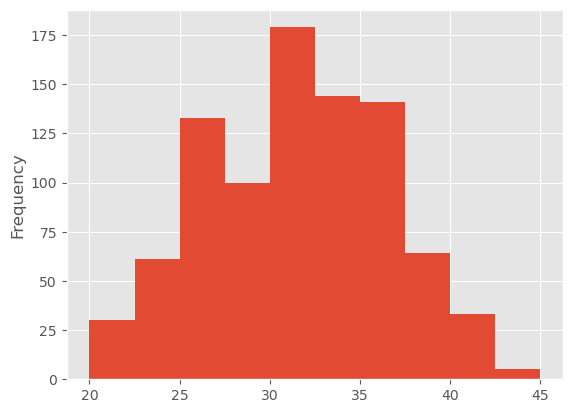

In [173]:
df_numeric["perc_nat_rubber"].plot.hist() # Looks rather "smooth". No need to be transformed

<AxesSubplot:>

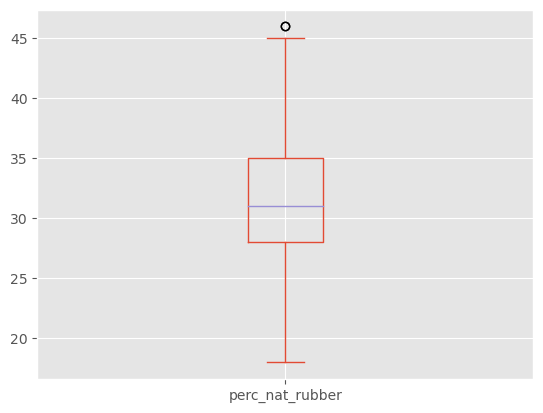

In [174]:
# Looking again at its boxplot in fact
df_drop_numeric["perc_nat_rubber"].plot.box() # Just one outlier...shall we remove it?

<AxesSubplot:>

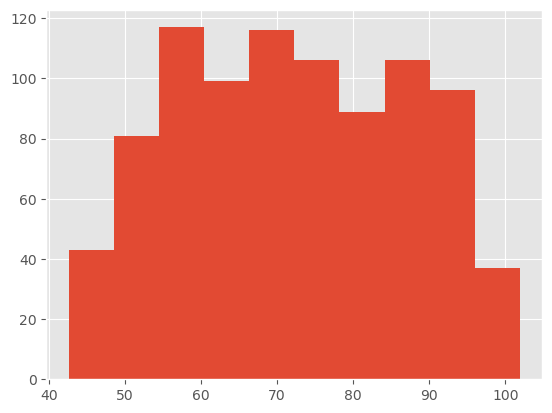

In [175]:
df_numeric["diameter"].hist() # Looks quite symmetrically distributed

array([[<AxesSubplot:title={'center':'log_vulc'}>,
        <AxesSubplot:title={'center':'log_elevation'}>]], dtype=object)

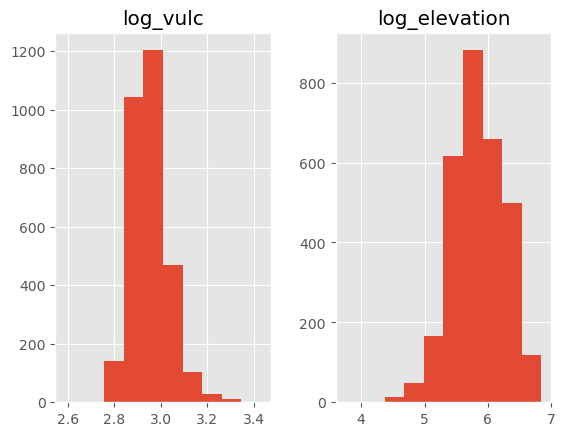

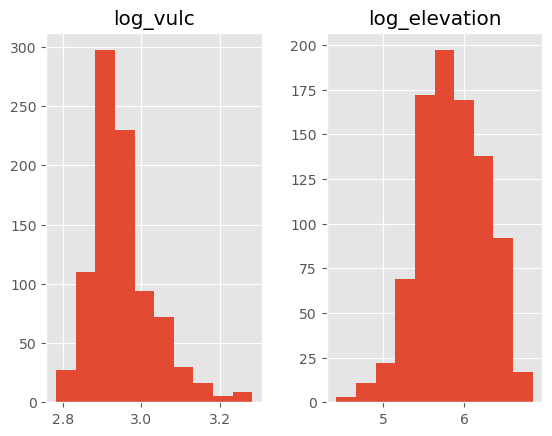

In [176]:
# Transforming data before scaling in order to avoid to mis-scaling them
import math

df_drop_numeric["log_vulc"] = df_drop_numeric["vulc"].apply(lambda x: math.log(x+1))
df_drop_numeric["log_elevation"] = df_drop_numeric["elevation"].apply(lambda x: math.log(x+1))

df_drop_numeric[["log_vulc", "log_elevation"]].hist()

df_numeric["log_vulc"] = df_numeric["vulc"].apply(lambda x: math.log(x+1))
df_numeric["log_elevation"] = df_numeric["elevation"].apply(lambda x: math.log(x+1))

df_numeric[["log_vulc", "log_elevation"]].hist()


In [ ]:
# Scaling data.... Not finished yet
from sklearn.preprocessing import MinMaxScaler
mm_scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))
mm_scaler.fit_transform(df[[""]])

failure
0    1992
1    1008
dtype: int64


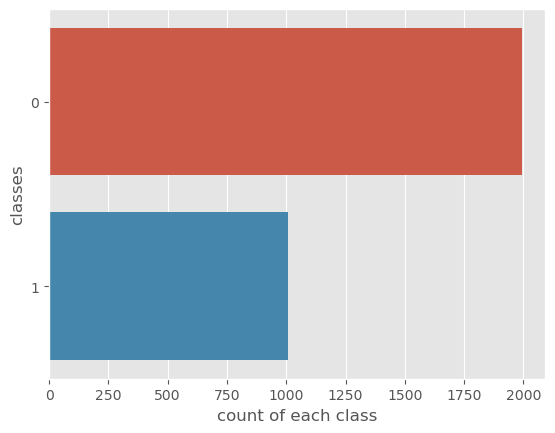

failure
0    585
1    305
dtype: int64


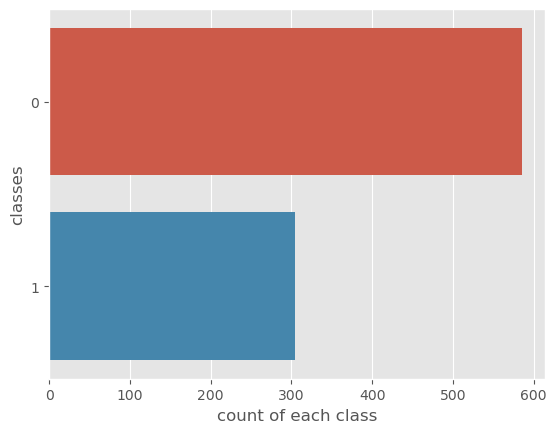

In [112]:
# Is the dataset Balanced or Unbalanced? 

print(df.groupby('failure').size()) #"target" is the name of the target column, change it accordingly to your dataset

plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.failure ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

# What if we would discard all the rows where we do NOT have the diameter? 

print(df.groupby('failure').size())
sns.countplot(y=df.failure ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

# Unbalanced dataset with ratio 2:1. Shall we try with over- or under-sampling?


## Feature selection

This decision will be made according to how the explanatory variables behave with respect to the dependent one.
Note: We will perform the feature selection on the df_drop, and, separately, on diameter

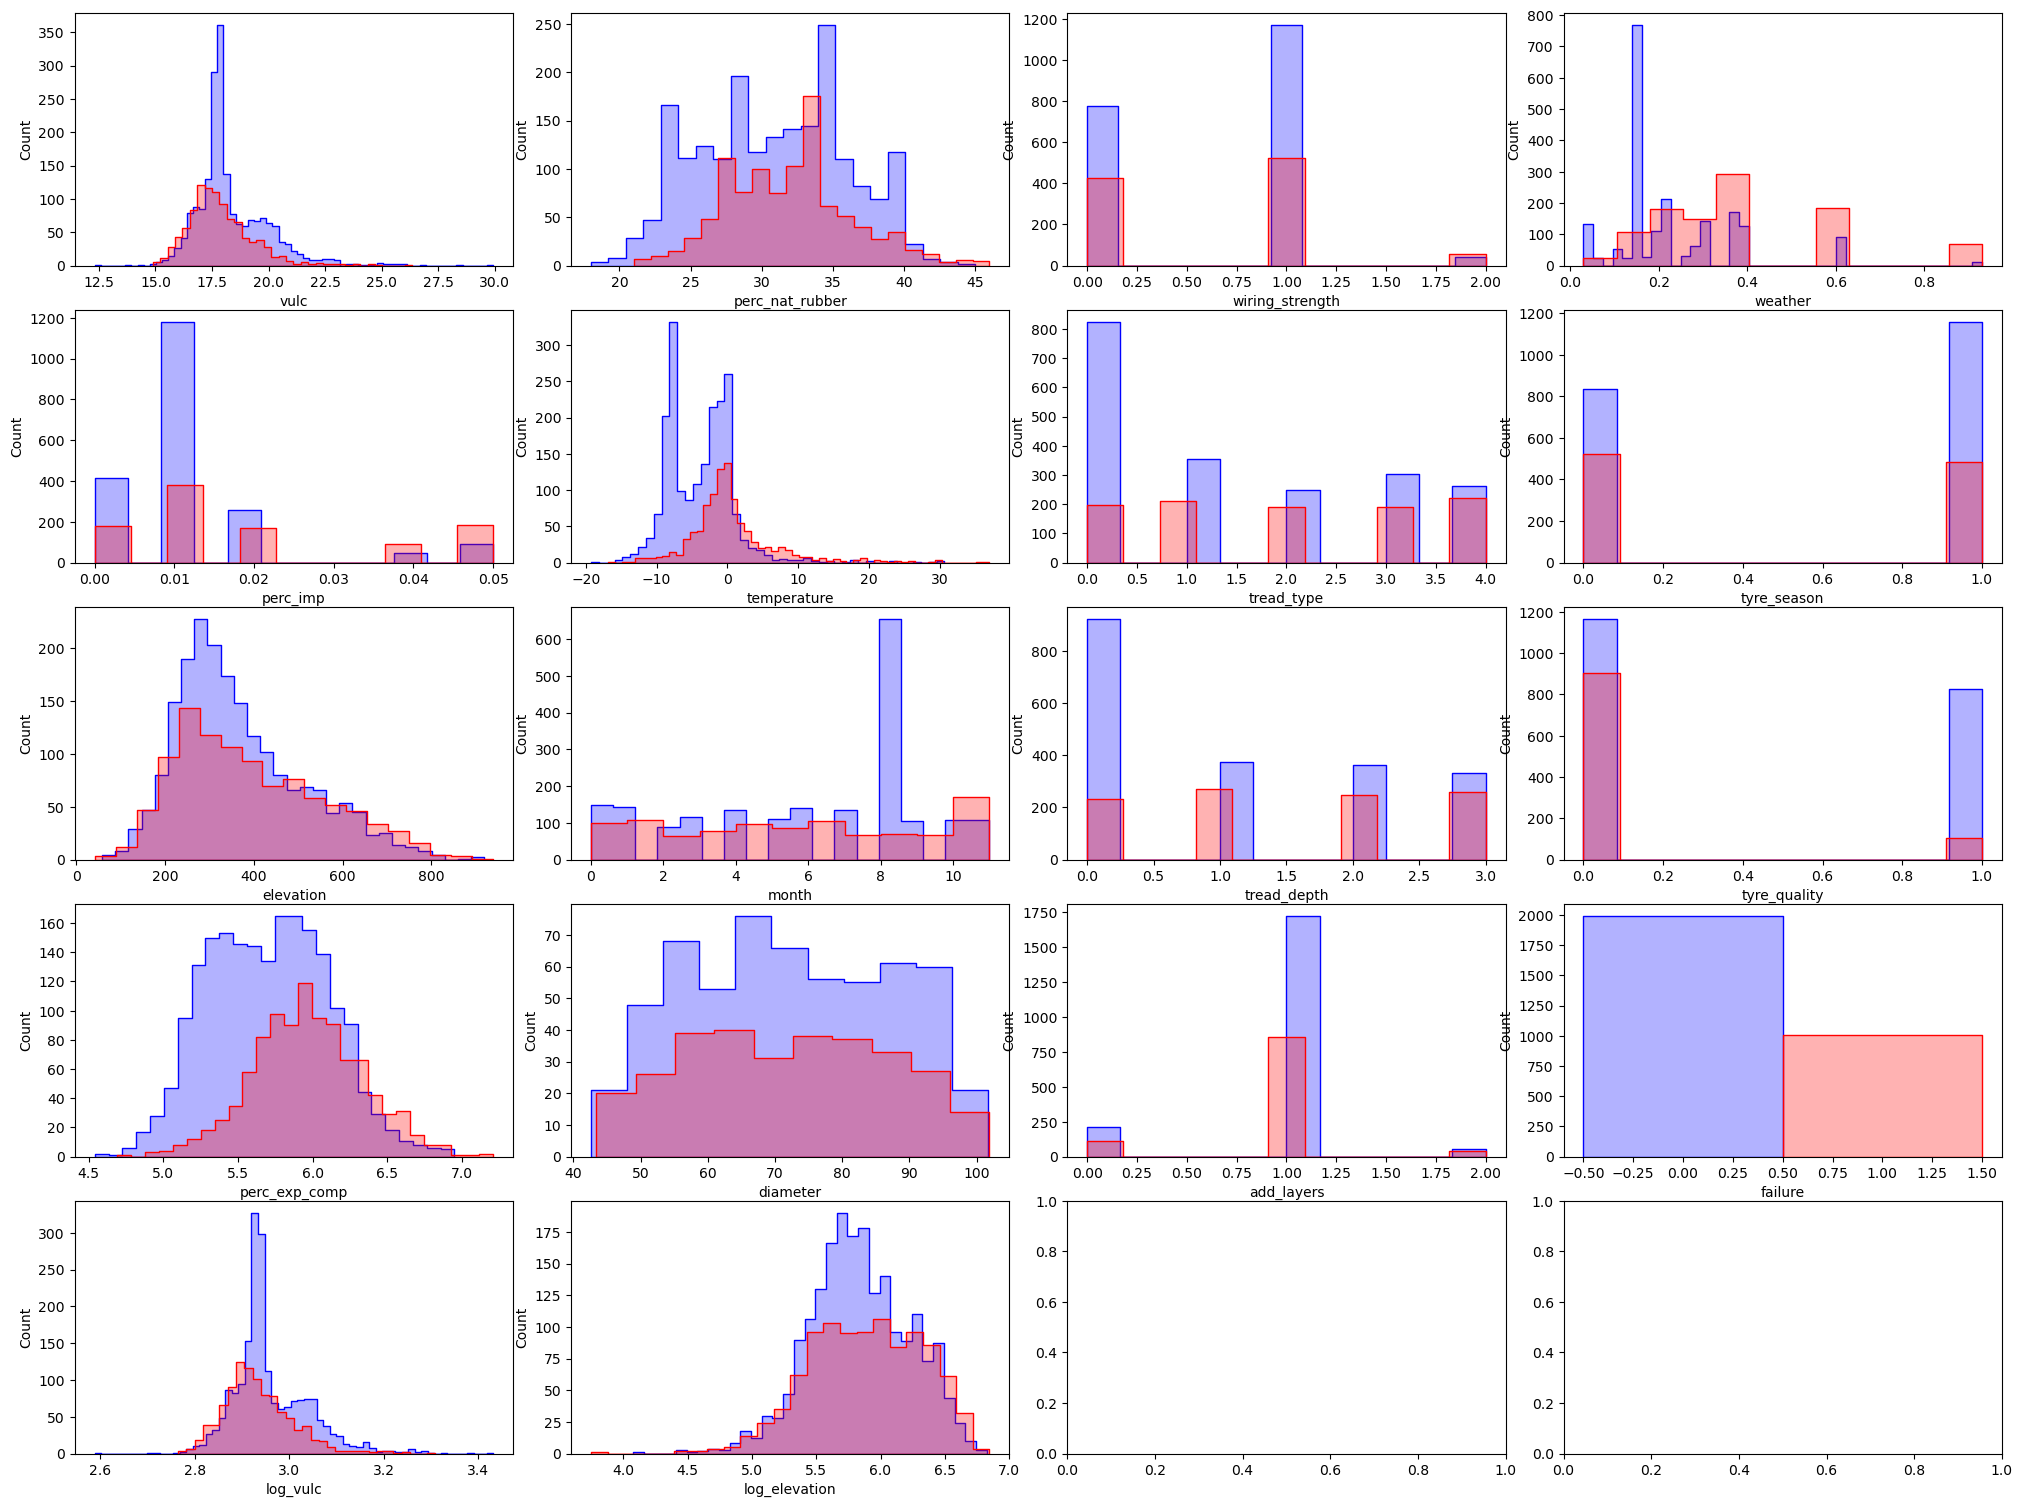

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

X_0 = df[df["failure"] == 0]
X_1 = df[df["failure"] == 1]

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(df.columns.size), axes.flat):
    sns.histplot(X_0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3)#ALpha is a "transparency" variable
    sns.histplot(X_1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

# Maybe temperature, weather 